In [201]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from matplotlib import pyplot as plt
import statsmodels.api as sm
import matplotlib as mpl
from scipy.io import loadmat
import scipy.stats as stats
import matplotlib.transforms
import matplotlib.path
import numpy as np
from matplotlib.collections import LineCollection

def rainbowarrow(ax, start, end, cmap="viridis", n=50,lw=3):
    cmap = plt.get_cmap(cmap,n)
    # Arrow shaft: LineCollection
    x = np.linspace(start[0],end[0],n)
    y = np.linspace(start[1],end[1],n)
    points = np.array([x,y]).T.reshape(-1,1,2)
    segments = np.concatenate([points[:-1],points[1:]], axis=1)
    lc = LineCollection(segments, cmap=cmap, linewidth=lw)
    lc.set_array(np.linspace(0,1,n))
    ax.add_collection(lc)
    # Arrow head: Triangle
    tricoords = [(0,-0.4),(0.5,0),(0,0.4),(0,-0.4)]
    angle = np.arctan2(end[1]-start[1],end[0]-start[0])
    rot = matplotlib.transforms.Affine2D().rotate(angle)
    tricoords2 = rot.transform(tricoords)
    tri = matplotlib.path.Path(tricoords2, closed=True)
    ax.scatter(end[0],end[1], c=1, s=(2*lw)**2, marker=tri, cmap=cmap,vmin=0)
    ax.autoscale_view()

# Robust Linear Regression -- Removing Missing Data

In [202]:
Label = "(Vineland Socialization Standard Score) \n Social Skills at 24 Months"

#Read Data
X = np.asarray(loadmat('Data.mat')['MR']).astype(float)
y = np.asarray(loadmat('Data.mat')['Vineland']).astype(float)

#Remove Missing Data
X = X[y!=-1]
X = np.reshape(X,(-1, 1))
y  = y[y!=-1]
y  = np.reshape(y,(-1, 1))
print(X.shape)

x_orig = np.copy(X)
y_orig = np.copy(y)

(117, 1)


In [203]:
### STATSMODELS ###
X = sm.add_constant(X)

# create a fitted model
lm = smf.RLM(y, X, M=sm.robust.norms.HuberT()).fit()
#lm = sm.OLS(y, X).fit()

# print the coefficients
lm.params

array([ 101.53890097,  -18.85881505])

In [204]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                  117
Model:                            RLM   Df Residuals:                      115
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 19 Sep 2018                                         
Time:                        18:57:24                                         
No. Iterations:                    14                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.5389      0.864    117.505      0.000      99.845     103.233
x1           -18.8588      8.190     -2.303      0.021     -34.911      -2.807
==============================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

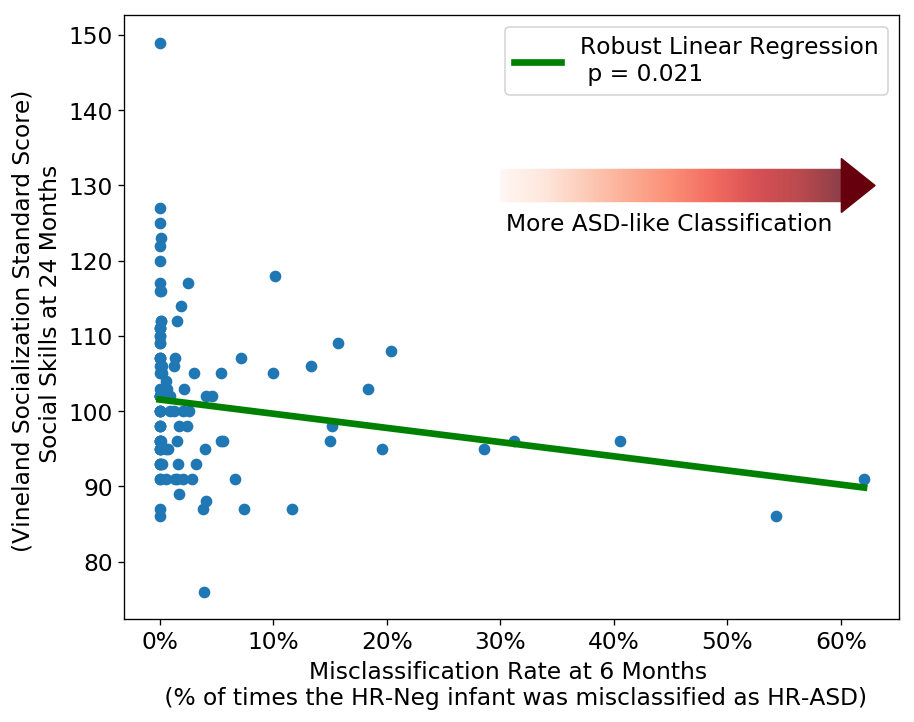

In [205]:
my_dpi = 120
fig = plt.figure(figsize=(1000/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(111)
ax.plot(X[:,1], y, 'o')
ax.plot(X[:,1], lm.fittedvalues, 'g-', label="Robust Linear Regression\n p = 0.021", lw=4)
ax.legend(loc="best")
ax.set_ylabel(Label)
ax.set_xlabel("Misclassification Rate at 6 Months \n (% of times the HR-Neg infant was misclassified as HR-ASD)")
plt.xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], ['0%', '10%', '20%', '30%', '40%', '50%', '60%'])
mpl.rcParams.update({'font.size': 14})
rainbowarrow(ax, (0.3,130), (0.6,130), cmap="Reds", n=1000,lw=20)
ax.text(0.305, 124, r'More ASD-like Classification', fontsize=14)
plt.savefig('Vineland_RLM.png', dpi=my_dpi)

# Robust Linear Regression -- Log Transform Misclassification Rate

In [206]:
### STATSMODELS ###

# Taking the log of the predector
c = 0.01
X[:,1] = np.log(X[:,1] + c)

# create a fitted model
lm_trans = smf.RLM(y, X, M=sm.robust.norms.HuberT()).fit()

# print the coefficients
lm_trans.params

array([ 92.92042815,  -2.10729789])

In [207]:
# print a summary of the fitted model
lm_trans.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                  117
Model:                            RLM   Df Residuals:                      115
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 19 Sep 2018                                         
Time:                        18:57:24                                         
No. Iterations:                    16                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.9204      2.985     31.126      0.000      87.069      98.771
x1            -2.1073      0.761     -2.770      0.006      -3.598      -0.616
==============================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

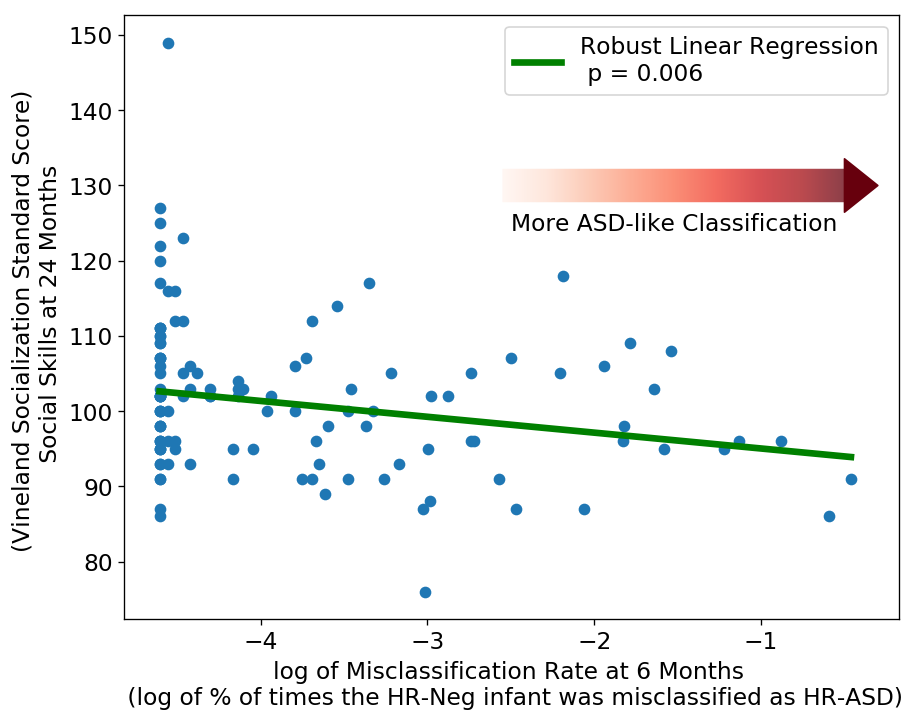

In [208]:
my_dpi = 120
fig = plt.figure(figsize=(1000/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(111)
ax.plot(X[:,1], y, 'o')
ax.plot(X[:,1], lm_trans.fittedvalues, 'g-', label="Robust Linear Regression\n p = 0.006", lw=4)
ax.legend(loc="best")
ax.set_ylabel(Label)
ax.set_xlabel("log of Misclassification Rate at 6 Months \n (log of % of times the HR-Neg infant was misclassified as HR-ASD)")
mpl.rcParams.update({'font.size': 14})
rainbowarrow(ax, (-2.55,130), (-0.5,130), cmap="Reds", n=1000,lw=20)
ax.text(-2.5, 124, r'More ASD-like Classification', fontsize=14)
plt.savefig('Vineland_RLM_Trans.png', dpi=my_dpi)

# Robust Linear Regression -- Subgroup Analysis 

In [209]:
# Divide data into subgroups using misclassification rate of 1%
threshold = 0.01
y_orig_subgroup1 = y_orig[x_orig < threshold]
y_orig_subgroup2 = y_orig[x_orig >= threshold]
y_orig_subgroup1.shape = (-1, 1)
y_orig_subgroup2.shape = (-1, 1)
data = [y_orig_subgroup1, y_orig_subgroup2]

In [210]:
# Perform 2 sample t-test
y_orig_subgroup1_mean = np.mean(y_orig_subgroup1)
y_orig_subgroup1_var = np.var(y_orig_subgroup1)

y_orig_subgroup2_mean = np.mean(y_orig_subgroup2)
y_orig_subgroup2_var = np.var(y_orig_subgroup2)

t_value, p_value = stats.ttest_ind_from_stats(y_orig_subgroup1_mean, np.sqrt(y_orig_subgroup1_var), y_orig_subgroup1.shape[0],
                              y_orig_subgroup2_mean, np.sqrt(y_orig_subgroup2_var), y_orig_subgroup2.shape[0],
                              equal_var=False)

print("2 sample t-test: t-value = %g  p-value = %g" % (t_value, p_value))

2 sample t-test: t-value = 3.10586  p-value = 0.00241716


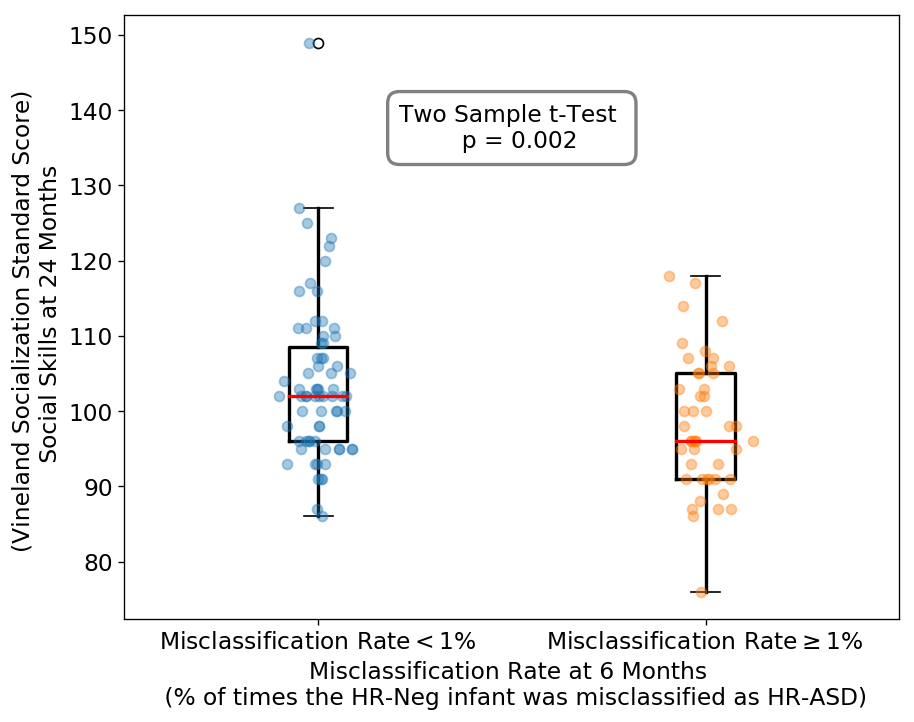

In [211]:
my_dpi = 120
fig = plt.figure(figsize=(1000/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(111)
plt.boxplot(data, boxprops= dict(linewidth=2.0, color='black'), whiskerprops=dict(linewidth=2.0, color='black'),medianprops=dict(linewidth=2.0, color='red'))
x1 = np.random.normal(1, 0.04, size=len(y_orig_subgroup1))
plt.plot(x1, y_orig_subgroup1,'o', alpha=0.4)
x2 = np.random.normal(2, 0.04, size=len(y_orig_subgroup2))
plt.plot(x2, y_orig_subgroup2,'o', alpha=0.4)
ax.text(1.5, 135, 'Two Sample t-Test \n  p = 0.002',ha="center",bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", lw=2))
plt.xticks([1, 2], ['Misclassification Rate$< 1\%$ ', 'Misclassification Rate$\geq 1\%$ '])
ax.set_xlabel("Misclassification Rate at 6 Months \n (% of times the HR-Neg infant was misclassified as HR-ASD)")
ax.set_ylabel(Label)
ax.set_ylabel(Label)
mpl.rcParams.update({'font.size': 14})
plt.savefig('Vineland_Subgroups.png', dpi=my_dpi)